In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch

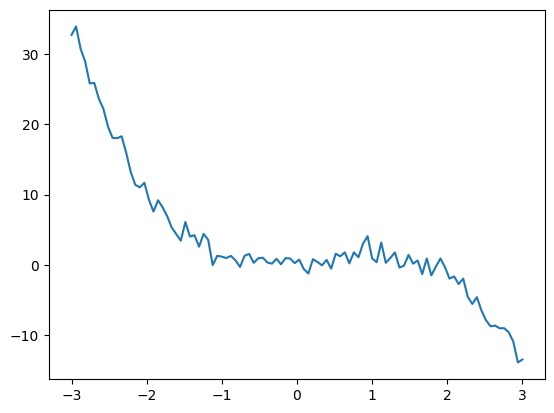

In [5]:
# data
x = np.array([-3.0000, -2.9394, -2.8788, -2.8182, -2.7576, -2.6970, -2.6364, -2.5758,
        -2.5152, -2.4545, -2.3939, -2.3333, -2.2727, -2.2121, -2.1515, -2.0909,
        -2.0303, -1.9697, -1.9091, -1.8485, -1.7879, -1.7273, -1.6667, -1.6061,
        -1.5455, -1.4848, -1.4242, -1.3636, -1.3030, -1.2424, -1.1818, -1.1212,
        -1.0606, -1.0000, -0.9394, -0.8788, -0.8182, -0.7576, -0.6970, -0.6364,
        -0.5758, -0.5152, -0.4545, -0.3939, -0.3333, -0.2727, -0.2121, -0.1515,
        -0.0909, -0.0303,  0.0303,  0.0909,  0.1515,  0.2121,  0.2727,  0.3333,
         0.3939,  0.4545,  0.5152,  0.5758,  0.6364,  0.6970,  0.7576,  0.8182,
         0.8788,  0.9394,  1.0000,  1.0606,  1.1212,  1.1818,  1.2424,  1.3030,
         1.3636,  1.4242,  1.4848,  1.5455,  1.6061,  1.6667,  1.7273,  1.7879,
         1.8485,  1.9091,  1.9697,  2.0303,  2.0909,  2.1515,  2.2121,  2.2727,
         2.3333,  2.3939,  2.4545,  2.5152,  2.5758,  2.6364,  2.6970,  2.7576,
         2.8182,  2.8788,  2.9394,  3.0000])


y = np.array([ 32.7259,  33.9219,  30.7402,  28.9232,  25.8228,  25.8859,  23.6411,
         22.1971,  19.6889,  18.0780,  18.0209,  18.2932,  15.9630,  13.2248,
         11.3853,  11.0389,  11.6764,   9.2575,   7.5808,   9.1931,   8.1941,
          6.9342,   5.3115,   4.3708,   3.4482,   6.1024,   4.0369,   4.2158,
          2.5897,   4.4165,   3.5717,  -0.0341,   1.2971,   1.1699,   0.9718,
          1.2803,   0.6469,  -0.2961,   1.2926,   1.5586,   0.2925,   0.9333,
          1.0227,   0.3404,   0.1778,   0.8658,   0.0883,   0.9646,   0.9060,
          0.2514,   0.7494,  -0.5932,  -1.2332,   0.8049,   0.4174,  -0.0669,
          0.7116,  -0.5411,   1.5823,   1.2207,   1.7757,   0.2184,   1.7736,
          1.0817,   3.0204,   4.0853,   0.9259,   0.3851,   3.1702,   0.2962,
          0.9795,   1.7703,  -0.3872,  -0.1107,   1.4136,   0.1688,   0.6242,
         -1.3091,   0.9057,  -1.5000,  -0.2429,   0.9046,  -0.3420,  -1.9564,
         -1.6371,  -2.7249,  -1.9593,  -4.5497,  -5.5621,  -4.5913,  -6.4857,
         -7.8823,  -8.7385,  -8.6351,  -9.0216,  -9.0111,  -9.5960, -10.9257,
        -13.8872, -13.4665])

plt.plot(x,y)


In [14]:
# For testing
q = np.array([0,1,2,3,4,5,6,7,8])
ind = 4
qbefore = q[:ind]
qafter  = q[ind+1:]
qmis = np.hstack((qbefore, qafter))

print(qmis)

I = np.ones(len(q), dtype=bool)
I[ind] = False
print(q[I])

#I = np.array([True, True, True,False, True, True, True, True, True])


[0 1 2 3 5 6 7 8]
[0 1 2 3 5 6 7 8]


Validation Error =  28.6821659231219


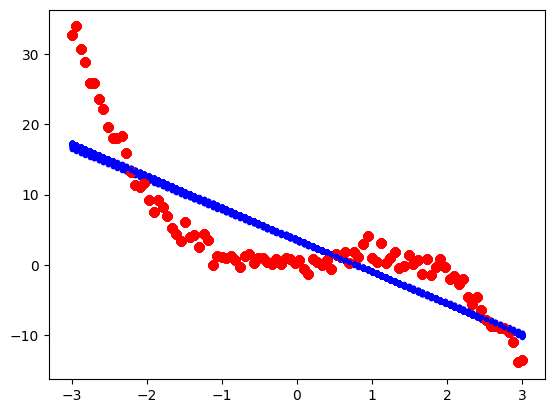

In [19]:
E = np.zeros(len(x))
for ind in range(len(x)):

  I = np.ones(len(x), dtype=bool)
  I[ind] = False
  xmis = x[I]
  ymis = y[I]

  A = np.vstack((xmis, np.ones(len(xmis)))).T
  b = ymis

  # Solve for the coefficients
  output = np.linalg.lstsq(A, b, rcond=None)

  a = output[0]
  r = output[1]

  # Apply to the data point not used
  xNU = x[ind]
  yNU = a[0]*xNU + a[1]

  error = (yNU - y[ind])**2
  E[ind] = error

  #print('theta = ', a)
  #print('error = ', error)

  plt.plot(xmis, ymis, 'or')
  plt.plot(xmis, a[0]*xmis + a[1], 'b.')

print('Validation Error = ',E.mean())


In [ ]:
E = np.zeros(len(x))
for ind in range(len(x)):

  I = np.ones(len(x), dtype=bool)
  I[ind] = False
  xmis = x[I]
  ymis = y[I]

  A = np.vstack((xmis, np.ones(len(xmis)))).T
  b = ymis

  # Solve for the coefficients
  output = np.linalg.lstsq(A, b, rcond=None)

  a = output[0]
  r = output[1]

  # Apply to the data point not used
  xNU = x[ind]
  yNU = a[0]*xNU + a[1]

  error = (yNU - y[ind])**2
  E[ind] = error

  #print('theta = ', a)
  #print('error = ', error)

  plt.plot(xmis, ymis, 'or')
  plt.plot(xmis, a[0]*xmis + a[1], 'b.')

print('Validation Error = ',E.mean())


theta =  [-4.49383784  3.59792108]


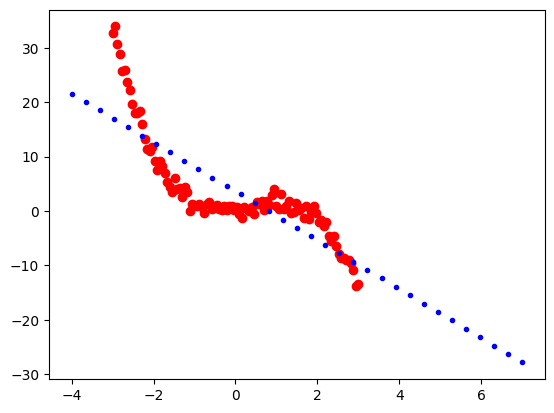

In [21]:
# Solve for the coefficients
output = np.linalg.lstsq(A, b, rcond=None)

a = output[0]
r = output[1]

print('theta = ', a)

#print('r = ', r)
residuals = b - A@a
#print('residuals = ', residuals)

xG = np.linspace(-4,7, 33)
yG = a[0]*xG + a[1]

plt.plot(x, y, 'or')
plt.plot(xG, yG, 'b.')

Validation Error =  20.626447265660396


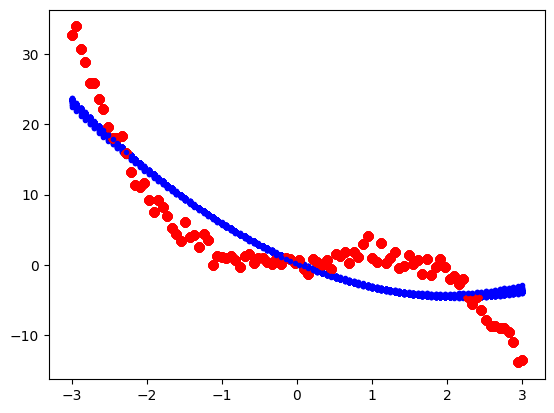

In [22]:
E = np.zeros(len(x))
for ind in range(len(x)):

  I = np.ones(len(x), dtype=bool)
  I[ind] = False
  xmis = x[I]
  ymis = y[I]

  A = np.vstack((xmis**2, xmis, np.ones(len(xmis)))).T
  b = ymis

  # Solve for the coefficients
  output = np.linalg.lstsq(A, b, rcond=None)

  a = output[0]
  r = output[1]

  # Apply to the data point not used
  xNU = x[ind]
  yNU = a[0]*xNU**2 + a[1]*xNU + a[2]

  error = (yNU - y[ind])**2
  E[ind] = error

  #print('theta = ', a)
  #print('error = ', error)

  plt.plot(xmis, ymis, 'or')
  plt.plot(xmis, a[0]*xmis**2 + a[1]*xmis + a[2], 'b.')

print('Validation Error = ',E.mean())


Validation Error =  1.0707116714019935


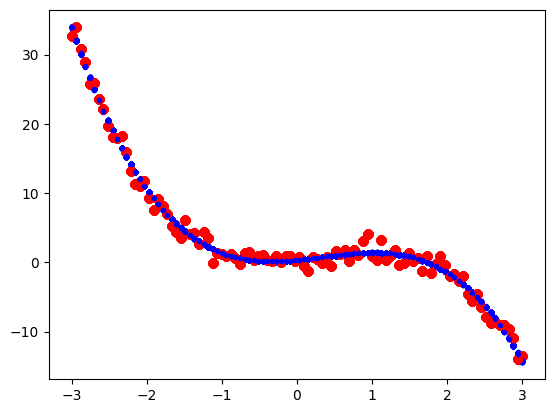

In [25]:
E = np.zeros(len(x))
for ind in range(len(x)):

  I = np.ones(len(x), dtype=bool)
  I[ind] = False
  xmis = x[I]
  ymis = y[I]

  A = np.vstack((xmis**3, xmis**2, xmis, np.ones(len(xmis)))).T
  b = ymis

  # Solve for the coefficients
  output = np.linalg.lstsq(A, b, rcond=None)

  a = output[0]
  r = output[1]

  # Apply to the data point not used
  xNU = x[ind]
  yNU = a[0]*xNU**3 + a[1]*xNU**2 + a[2]*xNU + a[3]

  error = (yNU - y[ind])**2
  E[ind] = error

  #print('theta = ', a)
  #print('error = ', error)

  plt.plot(xmis, ymis, 'or')
  plt.plot(xmis, a[0]*xmis**3 + a[1]*xmis**2 + a[2]*xmis + a[3], 'b.')

print('Validation Error = ',E.mean())


[[ 9. -3.  1.]
 [ 1.  1.  1.]
 [ 4.  2.  1.]
 [ 9.  3.  1.]
 [16.  4.  1.]
 [25.  5.  1.]
 [36.  6.  1.]]
[10.  1.  7.  9. 16. 30. 40.]
theta =  [1.10663856 0.03433739 0.24543868]
r =  [15.09856984]
residuals =  [-0.10217357 -0.38641463  2.25933229 -1.30819791 -2.08900524  1.91691031
 -0.29045126]


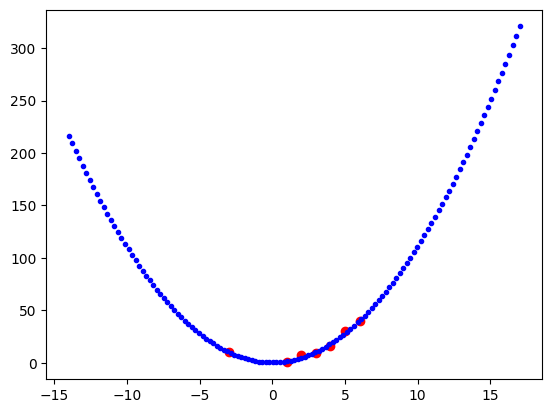

In [23]:
A = np.vstack((x**2, x, np.ones(len(x)))).T
b = y
print(A)
print(b)

# Solve for the coefficients
output = np.linalg.lstsq(A, b, rcond=None)

a = output[0]
r = output[1]

print('theta = ', a)

print('r = ', r)

residuals = b - A@a

print('residuals = ', residuals)
xG = np.linspace(-14,17, 129)
yG = a[0]*xG**2 + a[1]*xG + a[2]

plt.plot(x, y, 'or')
plt.plot(xG, yG, 'b.')

[[-27.   9.  -3.   1.]
 [  1.   1.   1.   1.]
 [  8.   4.   2.   1.]
 [ 27.   9.   3.   1.]
 [ 64.  16.   4.   1.]
 [125.  25.   5.   1.]
 [216.  36.   6.   1.]]
[10.  1.  7.  9. 16. 30. 40.]
theta =  [ 0.0207602   1.00612797 -0.1712785   0.98221332]
r =  [14.51094058]
residuals =  [ 0.00932481 -0.83782299  2.1697502  -1.08405495 -1.72379963  2.12595495
 -0.6593524 ]


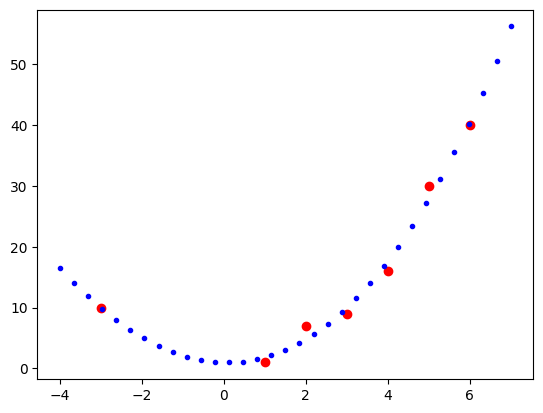

In [21]:
A = np.vstack((x**3, x**2, x, np.ones(len(x)))).T
b = y
print(A)
print(b)

# Solve for the coefficients
output = np.linalg.lstsq(A, b, rcond=None)

a = output[0]
r = output[1]

print('theta = ', a)

print('r = ', r)

residuals = b - A@a

print('residuals = ', residuals)
xG = np.linspace(-4,7, 33)
yG = a[0]*xG**3 + a[1]*xG**2 + a[2]*xG + a[3]

plt.plot(x, y, 'or')
plt.plot(xG, yG, 'b.')

[[ 8.100e+01 -2.700e+01  9.000e+00 -3.000e+00  1.000e+00]
 [ 1.000e+00  1.000e+00  1.000e+00  1.000e+00  1.000e+00]
 [ 1.600e+01  8.000e+00  4.000e+00  2.000e+00  1.000e+00]
 [ 8.100e+01  2.700e+01  9.000e+00  3.000e+00  1.000e+00]
 [ 2.560e+02  6.400e+01  1.600e+01  4.000e+00  1.000e+00]
 [ 6.250e+02  1.250e+02  2.500e+01  5.000e+00  1.000e+00]
 [ 1.296e+03  2.160e+02  3.600e+01  6.000e+00  1.000e+00]]
[10.  1.  7.  9. 16. 30. 40.]
theta =  [-0.00821058  0.08708401  0.98264898 -0.79549893  1.76363195]
r =  [14.34454066]
residuals =  [ 0.02235564 -1.02965544  2.33146713 -0.90718751 -1.77548874  1.89374796
 -0.53523904]


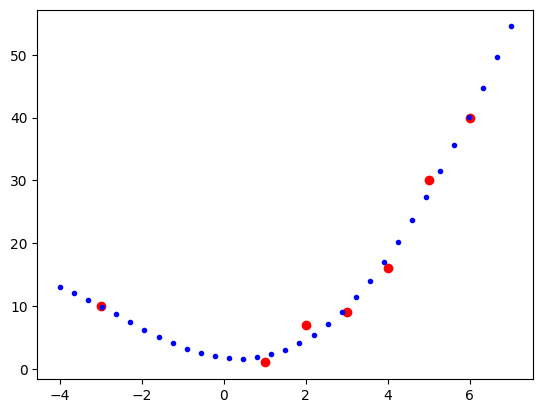

In [22]:
A = np.vstack((x**4, x**3, x**2, x, np.ones(len(x)))).T
b = y
print(A)
print(b)

# Solve for the coefficients
output = np.linalg.lstsq(A, b, rcond=None)

a = output[0]
r = output[1]

print('theta = ', a)

print('r = ', r)

residuals = b - A@a

print('residuals = ', residuals)
xG = np.linspace(-4,7, 33)
yG = a[0]*xG**4 + a[1]*xG**3 + a[2]*xG**2 + a[3]*xG + a[4]

plt.plot(x, y, 'or')
plt.plot(xG, yG, 'b.')

In [18]:
s = np.linspace(0,1,11)
print(s)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
